# Task 4.9
# Part 2

## 1.Create a new notebook, import the necessary analysis and visualization libraries, then import your most up-to-date project data (i.e., the data set with your new customer data from the first part of this task).

In [3]:
#importing libraries
import pandas as pd
import numpy as np
import os
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
#importing dataframe
df_ords_prods_merge_custs = pl.read_parquet(os.path.join("data", "prepared", "df_ords_prods_merge_custs.parquet"))

In [5]:
#checking output
df_ords_prods_merge_custs.shape

(32404859, 35)

In [6]:
df_ords_prods_merge_custs.head()

product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,Avg_spending,spending_flag,user_ord_behaviour,order_frequecy_flag,order_frequency-flag,order_frequency_flag,user_ord_median,frequent_flag,frequency_flag,gender,state,age,date_joined,number_of_dependants,marital_status,income
i64,str,i64,i64,f64,i64,i64,i64,i64,i64,f64,i64,i64,str,str,str,str,i64,str,f64,str,f64,str,str,str,f64,str,str,str,str,i64,str,i64,str,i64
1,"""Chocolate Sandwich Cookies""",61,19,5.8,3139998,138,28,6,11,3.0,5,0,"""Mid-range-product""","""Regularly busy""","""Regular days""","""Most orders""",32,"""Regular customer""",6.935811,"""Low spender""",8.0,null,"""Frequent customer""","""Frequent customer""",8.0,"""Frequent customer""","""Frequent customer""","""Male""","""Minnesota""",81,"""8/1/2019""",1,"""married""",49620
1,"""Chocolate Sandwich Cookies""",61,19,5.8,1977647,138,30,6,17,20.0,1,1,"""Mid-range-product""","""Regularly busy""","""Regular days""","""Most orders""",32,"""Regular customer""",6.935811,"""Low spender""",8.0,null,"""Frequent customer""","""Frequent customer""",8.0,"""Frequent customer""","""Frequent customer""","""Male""","""Minnesota""",81,"""8/1/2019""",1,"""married""",49620
1,"""Chocolate Sandwich Cookies""",61,19,5.8,389851,709,2,0,21,6.0,20,0,"""Mid-range-product""","""Busiest day""","""Busiest days""","""Average orders""",5,"""New customer""",7.930208,"""Low spender""",8.0,null,"""Frequent customer""","""Frequent customer""",8.0,"""Frequent customer""","""Frequent customer""","""Female""","""Vermont""",66,"""6/16/2018""",2,"""married""",158302
1,"""Chocolate Sandwich Cookies""",61,19,5.8,652770,764,1,3,13,null,10,0,"""Mid-range-product""","""Regularly busy""","""slowest days""","""Most orders""",3,"""New customer""",4.972414,"""Low spender""",9.0,null,"""Frequent customer""","""Frequent customer""",9.0,"""Frequent customer""","""Frequent customer""","""Female""","""Wisconsin""",40,"""2/9/2020""",3,"""married""",31308
1,"""Chocolate Sandwich Cookies""",61,19,5.8,1813452,764,3,4,17,9.0,11,1,"""Mid-range-product""","""Least busy""","""slowest days""","""Most orders""",3,"""New customer""",4.972414,"""Low spender""",9.0,null,"""Frequent customer""","""Frequent customer""",9.0,"""Frequent customer""","""Frequent customer""","""Female""","""Wisconsin""",40,"""2/9/2020""",3,"""married""",31308


# 3.You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
## In a markdown cell beneath your histogram, describe what the histogram demonstrates.


To create an histogram of 'order_hour_of-day', i will have to convert the order_hour_of _day column to pandas.

In [7]:
#converting order_hour_of_day in df_ords_prods_merge_custs dataframe to pandas
order_hour_of_day = df_ords_prods_merge_custs.select('order_hour_of_day').to_pandas()

In [8]:
#check output
order_hour_of_day.head()

,order_hour_of_day
0,11
1,17
2,21
3,13
4,17


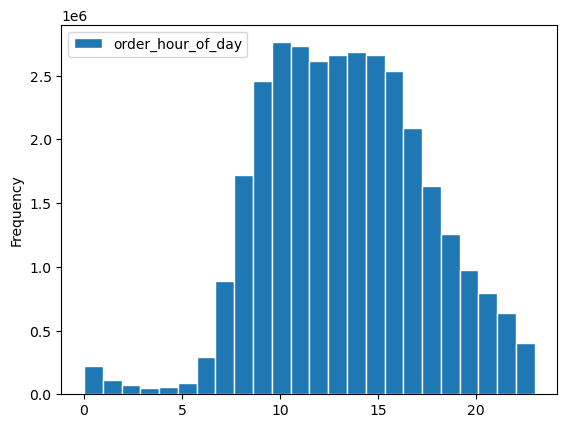

In [9]:
#creating histogram
hist = order_hour_of_day.plot.hist(bins = 24, edgecolor='white')

The histogram shows that order activity is minimal from midnight until about 5 a.m. 
It begins to rise sharply after 6 a.m., increasing strongly between 8 and 10 a.m. 
Order counts remain consistently high from roughly 10 a.m. to 3 p.m., then decline noticeably after 5–6 p.m.
Overall, the data reveal that customers place most of their orders in the late morning and early afternoon, with very little activity during the night.

# 4.The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column

To create a bar chart of 'loyalty_flag', i will have to convert the loyalty_flag column from polars column to pandas.

In [10]:
#converting loyalty_flag in df_ords_prods_merge_custs dataframe to pandas
loyalty_flag = df_ords_prods_merge_custs.select('loyalty_flag').to_pandas()

In [11]:
#check output
loyalty_flag.value_counts()

loyalty_flag    
Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: count, dtype: int64

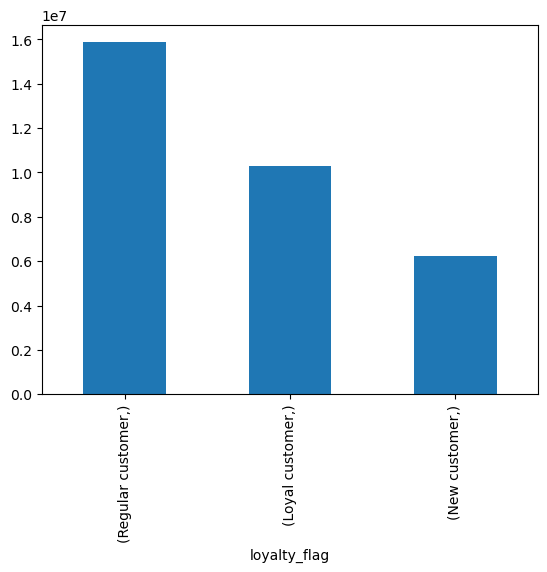

In [12]:
#To plot loyalty flag bar chart
bar = loyalty_flag.value_counts().plot.bar()

# 5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

i want to avoid converting the whole df_ords_prods_merge_custs dataframe to pandas because its a very large file, so i will use only select the neccessary colunmns i need in the exercise  'order_hour_of _day', 'prices', 'age', 'number_of_dependants', income  together as a new data set and convert only those columns to pandas.
then do 70/30 split sampling method of the dataset.

In [13]:
#converting order_hour_of_day and prices toegteher as a dataframe to pandas
new_pd = df_ords_prods_merge_custs.select(["order_hour_of_day", "prices", "age", "number_of_dependants", "income"]).to_pandas()

In [14]:
#check output
new_pd.head()

,order_hour_of_day,prices,age,number_of_dependants,income
0,11,5.8,81,1,49620
1,17,5.8,81,1,49620
2,21,5.8,66,2,158302
3,13,5.8,40,3,31308
4,17,5.8,40,3,31308


In [17]:
#Create a random sample 
np.random.seed(4)

In [18]:
#create a list of holding True/False values to the test np.ransom.rand()<=0.7
dev = np.random.rand(len(new_pd)) <= 0.7

In [19]:
#store 70% of the sample in the data frame big
big = new_pd [dev]

In [20]:
#store 30% or the sample in the dataframe small
small = new_pd [~dev]

In [21]:
#check output
len(new_pd)

32404859

In [22]:
len(big) + len(small)

32404859

In [23]:
#check output
new_pd

,order_hour_of_day,prices,age,number_of_dependants,income
0,11,5.8,81,1,49620
1,17,5.8,81,1,49620
2,21,5.8,66,2,158302
3,13,5.8,40,3,31308
4,17,5.8,40,3,31308
...,...,...,...,...,...
32404854,9,13.5,47,1,166687
32404855,11,13.5,25,0,53936
32404856,8,13.5,57,1,100649
32404857,15,13.5,57,1,100649


In [24]:
# A new dataframe that contains only the "prices" and "order_hour_of_day" columns from small subset
df_2 = small[['order_hour_of_day','prices']]

In [25]:
#check output
df_2

,order_hour_of_day,prices
0,11,5.8
2,21,5.8
3,13,5.8
6,14,5.8
10,11,5.8
...,...,...
32404841,11,13.5
32404842,20,13.5
32404843,10,13.5
32404849,9,13.5


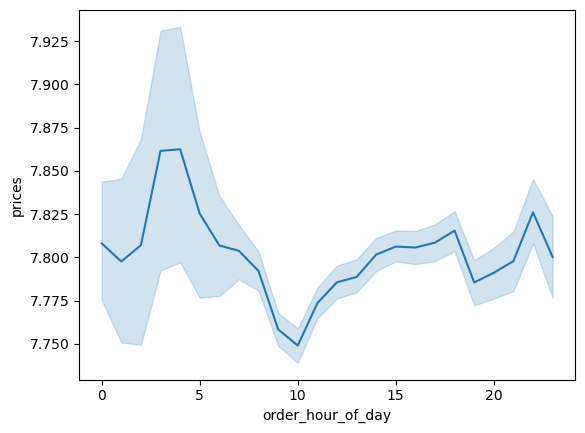

In [26]:
# Create the line chart
line_1 = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

# 6.Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:

## In a markdown cell beneath your line chart, describe what the line chart shows.


In [27]:
#new dataframe that contains only the "age" and "number_of_dependants" columns from small subset
df_3 = small[['age','number_of_dependants']]

In [28]:
#check output
df_3

,age,number_of_dependants
0,81,1
2,66,2
3,40,3
6,20,3
10,61,1
...,...,...
32404841,59,1
32404842,39,0
32404843,53,2
32404849,66,0


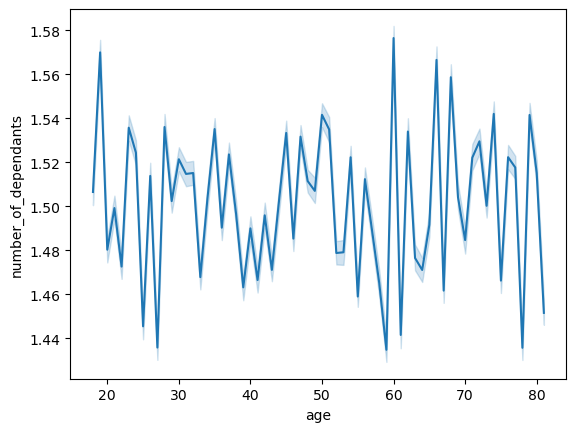

In [29]:
#Create the line chart
line_2 = sns.lineplot(data = df_3, x = 'age',y = 'number_of_dependants')

The chart shows age along the x-axis and number of dependants along the y-axis.
Across all age groups, from the late teens to the 80s, the values stay close to about 1.5 dependants, indicating that people of different ages generally have one to two dependants.
The pattern remains fairly consistent with no obvious upward or downward trend, suggesting that age doesn't have a strong relationship with the number of dependants in this dataset.

# 7.You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
## In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

In [30]:
#Create a new dataframe that contains only the "age" and "income" columns from small subset 
df_4 = small[['age','income']]

In [31]:
#check output
df_4

,age,income
0,81,49620
2,66,158302
3,40,31308
6,20,34171
10,61,42573
...,...,...
32404841,59,118691
32404842,39,64061
32404843,53,102296
32404849,66,106393


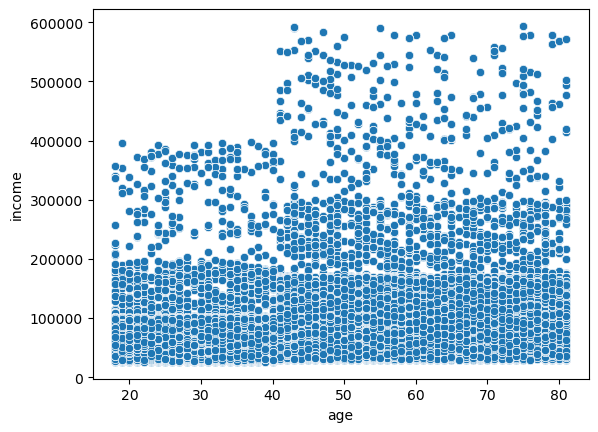

In [32]:
#Create a scatterplot
scatterplot = sns.scatterplot(data = df_4, x = 'age', y = 'income')

The scatterplot displays age on the x-axis and income on the y-axis.
Points are widely scattered with no clear upward or downward trend, suggesting that income is not strongly related to age in this dataset.
in conclusion, the plot suggests income varies greatly at every age and age alone doesn’t predict higher or lower earnings in this sample.

In [33]:
#Export Histogram
hist.figure.savefig(os.path.join('Analysis','Visualizations', 'hist_order_hour_of_day.png'))

In [34]:
#Export bar chart
bar.figure.savefig(os.path.join('Analysis','Visualizations', 'bar_loyalty_flag.png'))

In [35]:
#Export Line chart - expenditure (the “prices” column) depending on the hour of the day
line_1.figure.savefig(os.path.join('Analysis','Visualizations', 'line_chart_expenditure_over_hours_of_day.png'))

In [36]:
#Export Line chart - connections between age and number of dependents
line_2.figure.savefig(os.path.join('Analysis','Visualizations', 'line_chart_age_and_number_of_dependents.png'))

In [37]:
#Export scatterplot - connection between age and spending power (income)
scatterplot.figure.savefig(os.path.join('Analysis','Visualizations', 'scatterplot_age_and _income.png'))